In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases/'
                 'breast-cancer-wisconsin/wdbc.data',header=None)

In [2]:
from sklearn.preprocessing import LabelEncoder
X= df.loc[:,2:].values
y= df.loc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [3]:
le.transform(['M','B'])

array([1, 0], dtype=int64)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = \
    train_test_split(X,y,
                 test_size=0.20,
                 stratify=y,
                 random_state=1)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1,solver='lbfgs'))
pipe_lr.fit(X_train,y_train)
y_pred= pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test,y_test))

Test Accuracy: 0.956


In [6]:
import numpy as np
from sklearn.model_selection import  StratifiedKFold
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores= []
for k ,(train,test)in enumerate(kfold):
    pipe_lr.fit(X_train[train],y_train[train])
    score = pipe_lr.score(X_train[test],y_train[test])
    scores.append(score)
    print('Fold: %2d, Class disr.: %s, Acc: %.3f'%(k+1,
                                                   np.bincount(y_train[train]),score))


Fold:  1, Class disr.: [256 153], Acc: 0.935
Fold:  2, Class disr.: [256 153], Acc: 0.935
Fold:  3, Class disr.: [256 153], Acc: 0.957
Fold:  4, Class disr.: [256 153], Acc: 0.957
Fold:  5, Class disr.: [256 153], Acc: 0.935
Fold:  6, Class disr.: [257 153], Acc: 0.956
Fold:  7, Class disr.: [257 153], Acc: 0.978
Fold:  8, Class disr.: [257 153], Acc: 0.933
Fold:  9, Class disr.: [257 153], Acc: 0.956
Fold: 10, Class disr.: [257 153], Acc: 0.956


In [7]:
print('\nCV accuray: %.3f +/- %.3f'%(np.mean(scores),np.std(scores)))



CV accuray: 0.950 +/- 0.014


In [8]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=-1)
print('\nCV accuray: %.3f +/- %.3f'%(np.mean(scores),np.std(scores)))


CV accuray: 0.950 +/- 0.014


In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           solver='lbfgs',
                                           max_iter=10000))

In [10]:
train_sizes,train_scores,test_scores=\
    learning_curve(estimator=pipe_lr,
                   X=X_train,
                   y=y_train,
                   train_sizes=np.linspace(0.1,1.0,10),
                   cv=10,
                   n_jobs=-1)

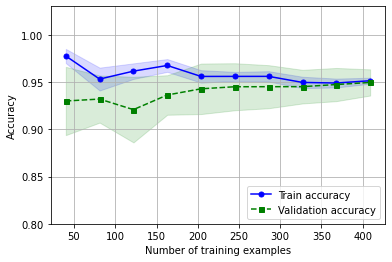

In [11]:
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)

test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes,train_mean,
         color='blue',marker='o',
         markersize=5,label='Train accuracy')
plt.fill_between(train_sizes,
                 train_mean+train_std,
                 train_mean-train_std,
                 alpha=0.15,color='blue')
plt.plot(train_sizes,test_mean,
         color='green',linestyle='--',
         marker='s',markersize=5,
         label='Validation accuracy')
plt.fill_between(train_sizes,
                 test_mean+test_std,
                 test_mean-test_std,
                 alpha=0.15,color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.03])
plt.show()